# Exercise - Multiple Linear Regression



It's time for you to apply your knowledge to a new dataset. So that not too much changes come at once, we will stick to the cars topic and work with the **car seats data**. A company that makes car seats would like to construct a model to predict sales and they need your help!

You will find the file called `carseats.csv` in the data folder. It contains 400 observations on the following 11 variables:
* **Sales**:         Unit sales (in thousands) at each location
* **CompPrice**:     Price charged by competitor at each location
* **Income**:        Community income level (in thousands of dollars)
* **Advertising**:   Local advertising budget for company at each location (in thousands of dollars)
* **Population**:    Population size in region (in thousands)
* **Price**:         Price company charges for car seats at each site
* **ShelveLoc**:     A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
* **Age**:           Average age of the local population
* **Education**:     Education level at each location
* **Urban**:         A factor with levels No and Yes to indicate whether the store is in an urban or rural location
* **US**:            A factor with levels No and Yes to indicate whether the store is in the US or not

**(a) Load the data**

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set figure stile and size for entire notebook
sns.set_style("ticks")
plt.rcParams["figure.figsize"] = (7,4)

# Import data with pandas 
carseats = pd.read_csv("data/carseats.csv")
carseats.head(n=2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes


In the data there are three columns where the data is given as strings, to explore relations, we will convert to numeric values

In [2]:
#  Firstr shelve location
carseats['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [3]:
# Define the mapping
mapping = {'Bad': 1, 'Good': 3, 'Medium': 2}
# Replace the string values with integers
carseats['ShelveLoc'] = carseats['ShelveLoc'].replace(mapping)

In [4]:
# Second Urban
carseats['Urban'].unique()

array(['Yes', 'No'], dtype=object)

In [5]:
# Define the mapping
mapping = {'Yes': 1,'No': 0}
# Replace the string values with integers
carseats['Urban'] = carseats['Urban'].replace(mapping)

In [6]:
# Finally US
carseats['US'].unique()

array(['Yes', 'No'], dtype=object)

In [7]:
# Define the mapping
mapping = {'Yes': 1,'No': 0}
# Replace the string values with integers
carseats['US'] = carseats['US'].replace(mapping)

**(b) Visualize the data with the appropriate plots.** 

<br>
<details><summary>
Click here for a hint…
</summary>
Check the documentation for seaborn's pair plots. 
</details>

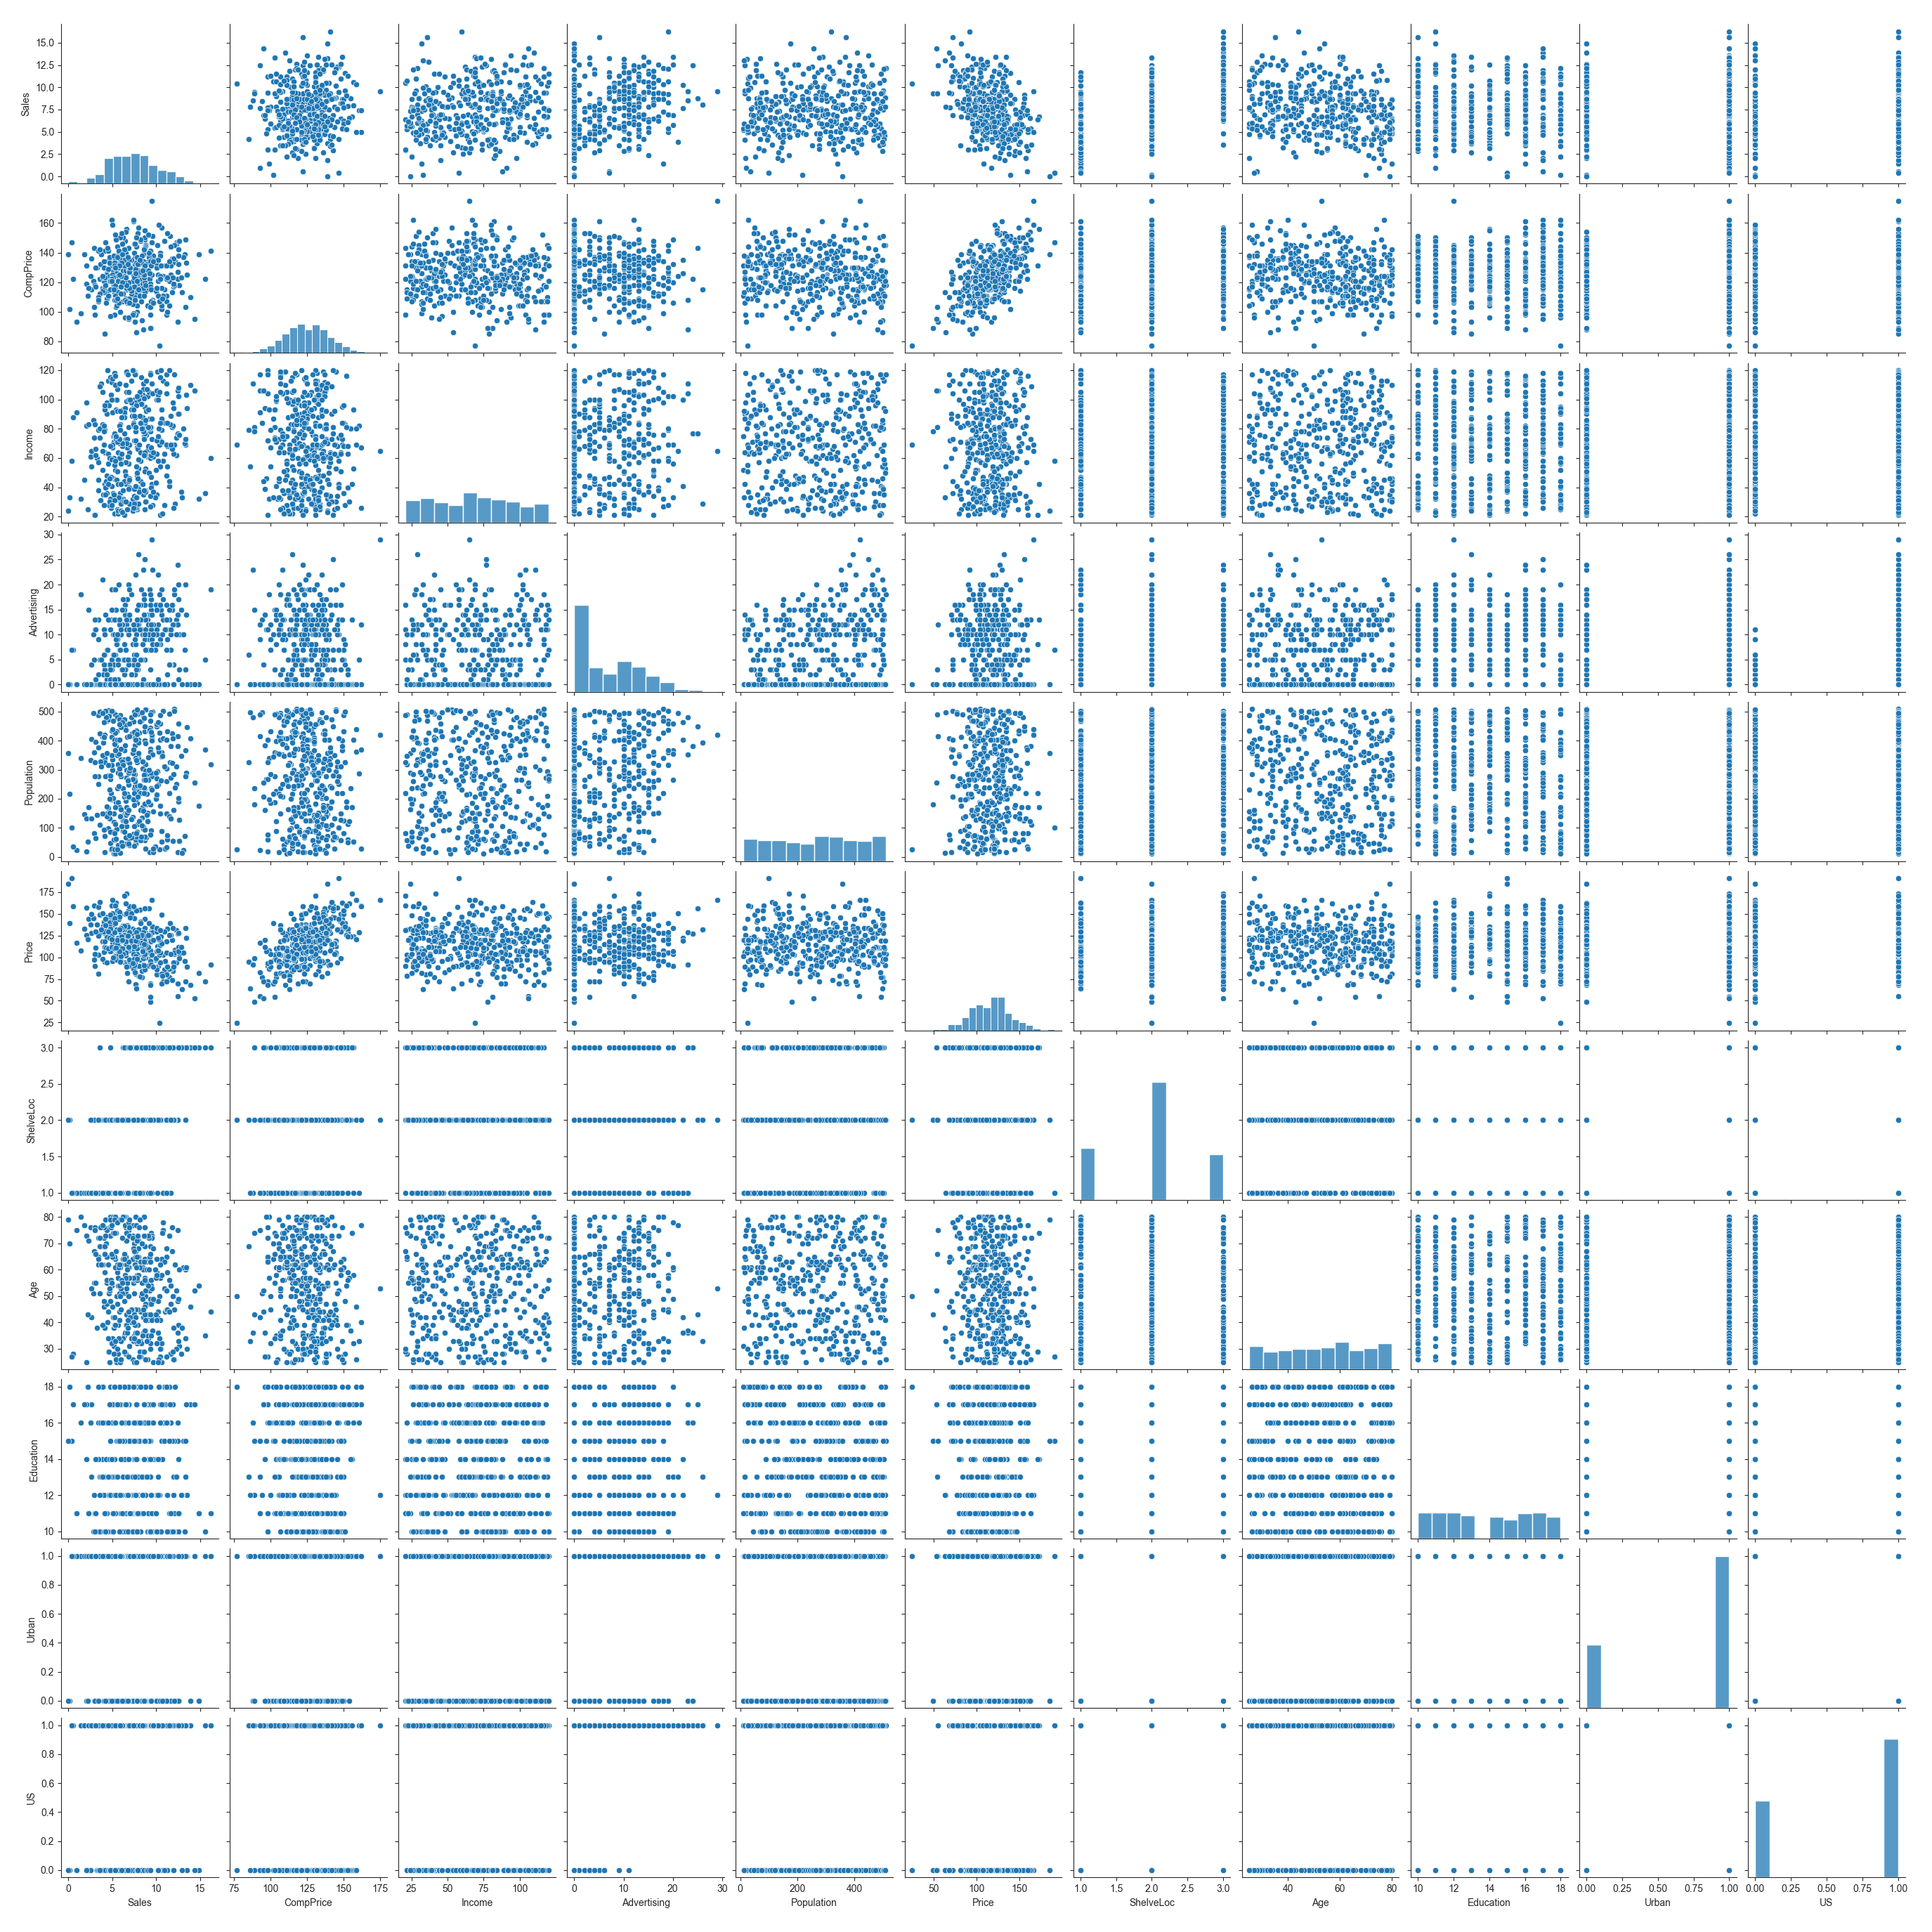

In [43]:
sns.pairplot(carseats)


**(c) What trends do you see in the data?**

**(d) Find the single best predictor for a simple linear regression.**

<br>
<details><summary>
Click here for a hint…
</summary>
Fit a linear model to all possible explanatory variables and pick best one.
</details>

X.shape:  (400, 1)
R-squared: 0.342


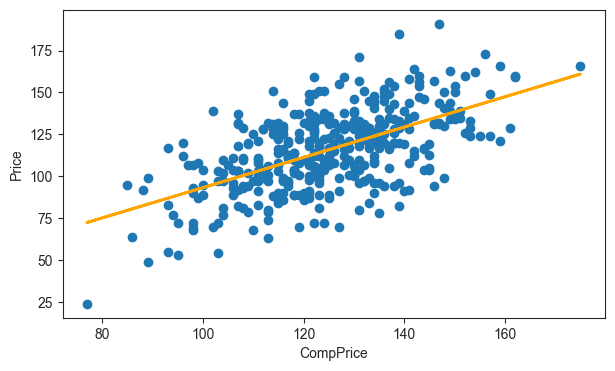

In [11]:
# Define feature and target variable
X = carseats[['CompPrice']]
y = carseats['Price']
print('X.shape: ',X.shape)
# Fit linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)
# Calculate r-squared 
y_hat = lin_reg.predict(X)
print("R-squared:", r2_score(y, y_hat).round(3))
# Plot data with regression line
plt.clf()
plt.scatter(X, y)
plt.plot(X, y_hat, '-', color='orange', linewidth=2)
plt.ylabel('Price')
plt.xlabel('CompPrice');


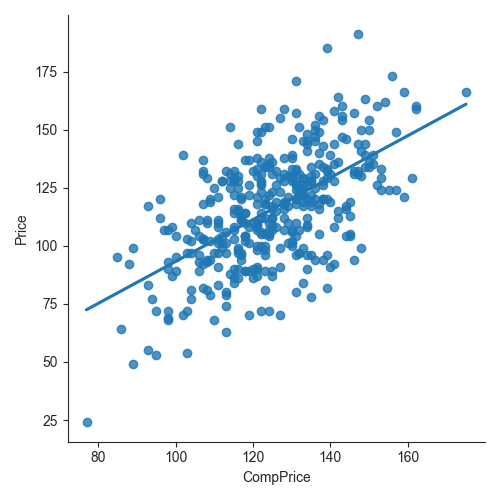

In [64]:
# Plot relationship between CompPrice and Sales
# We can use seaborns .lmplot function to plot our data including a regression line 
sns.lmplot(x='CompPrice', y='Price', data=carseats, ci=None);

**(e) Fit a model with all possible explanatory variables.**

In [12]:
# CompPrice, US, Urban and sales
# Print correlation of variables
carseats[['CompPrice', 'US', 'Urban', 'Sales']].corr()

,CompPrice,US,Urban,Sales
CompPrice,1.000000,0.016869,0.066594,0.064079
US,0.016869,1.000000,0.047085,0.177093
Urban,0.066594,0.047085,1.000000,-0.015419
Sales,0.064079,0.177093,-0.015419,1.000000


In [14]:
# Define and fit model with multiple variables
X1 = carseats[['CompPrice', 'US', 'Urban']]
y1 = carseats.Sales

# Fit linear regression model
lin_reg1 = LinearRegression()
lin_reg1.fit(X1, y1)

# Calculate intercept and coefficient
intercept = lin_reg1.intercept_
coefficients = lin_reg1.coef_
print("Intercept:", intercept.round(4))
print("Coefficients:", coefficients.round(4))

# Calculate r-squared 
y_hat1 = lin_reg1.predict(X1)
print("R-squared:", r2_score(y1, y_hat1).round(3))

Intercept: 5.4951
Coefficients: [ 0.0116  1.0454 -0.1729]
R-squared: 0.036


**(f) What's the best model according to $R^2$?**

**(g) Remove a couple of explanatory variables. How does $R^2$ change?**

In [15]:
# Define and fit model with multiple variables
X2 = carseats[['CompPrice', 'US',]]
y2 = carseats.Sales

# Fit linear regression model
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y2)

# Calculate intercept and coefficient
intercept = lin_reg1.intercept_
coefficients = lin_reg1.coef_
print("Intercept:", intercept.round(4))
print("Coefficients:", coefficients.round(4))

# Calculate r-squared 
y_hat2 = lin_reg2.predict(X2)
print("R-squared:", r2_score(y2, y_hat2).round(3))

Intercept: 5.4951
Coefficients: [ 0.0116  1.0454 -0.1729]
R-squared: 0.035


**(h) Repeat the process for the adjusted $R^2$.**

**(i) What are your most interesting findings?**

<br>
<br> 
<br>

----